# -----------------------------------TITANIC-----------------------------------

# Composition du groupe 9

- Ait Lhaj Walid
- Bouhamidi El Alaoui Kaoutar
- Razafindramisa Andrianihary Tsiory
- Thomas Eliott

In [370]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

# Ouverture des fichiers de données

In [371]:
train_df = pd.read_csv('data/train.csv') # load train data
test_df = pd.read_csv('data/test.csv') # load test data

In [372]:
train_df.set_index('PassengerId',inplace=True) # set PassengerId as index

In [373]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [374]:
test_df.set_index('PassengerId',inplace=True) # set PassengerId as index


In [375]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### On fusionne le dataset de test et de train pour la visualisation et le preprocessing

In [376]:
merged_df = pd.concat([train_df, test_df], ignore_index=False) # merge train and test data

In [377]:
merged_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


# Visualisation des données 

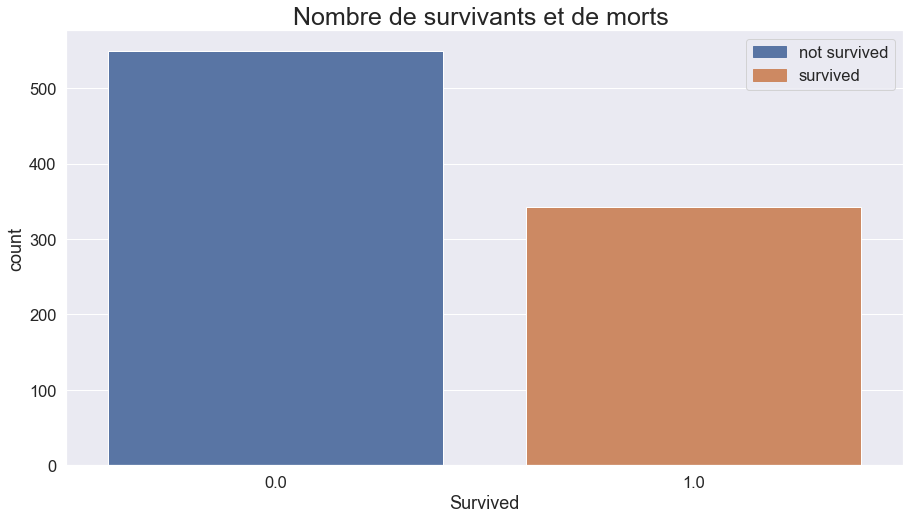

In [378]:
plt.figure(figsize=(15,8)) 
plt.title("Nombre de survivants et de morts " , fontsize=25) # set title
colors = {'not survived':'#5975a4', 'survived':'#cd8962'} # set colors for survived and not survived        
labels = list(colors.keys()) # set labels for survived and not survived
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels] 
plt.legend(handles, labels) # set legend
sns.set(font_scale=1.5) 
sns.countplot(x='Survived', data=merged_df); # plot survived and not survived


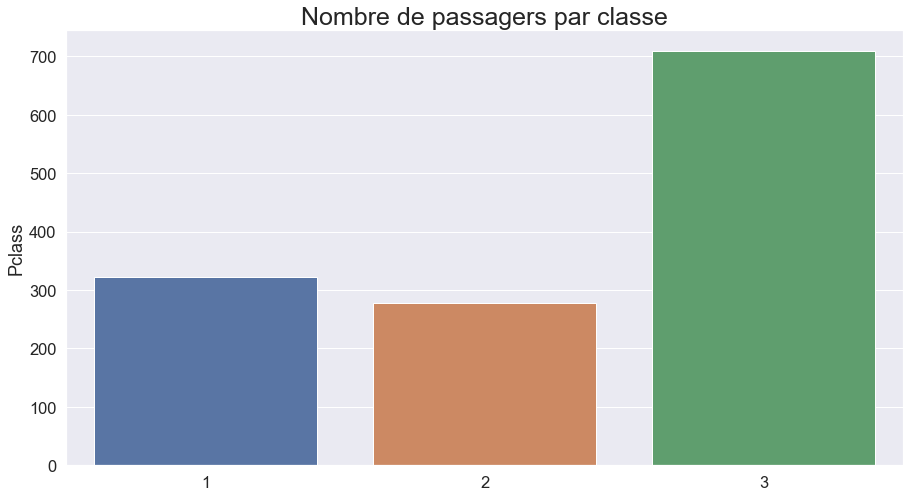

In [379]:
plt.figure(figsize=(15,8))
plt.title('Nombre de passagers par classe' , fontsize=25) 
sns.barplot(x=merged_df['Pclass'].unique(), y=merged_df['Pclass'].value_counts(), data=merged_df); # plot number of passengers by class


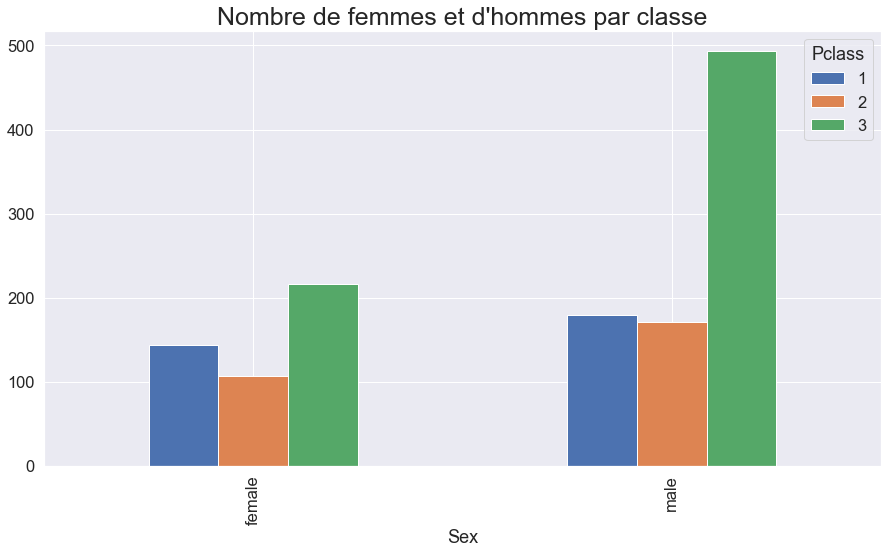

In [380]:
pd.crosstab(merged_df['Sex'], merged_df["Pclass"]).plot(kind='bar',figsize=(15,8)) 
plt.title("Nombre de femmes et d'hommes par classe", fontsize=25) 
plt.show();


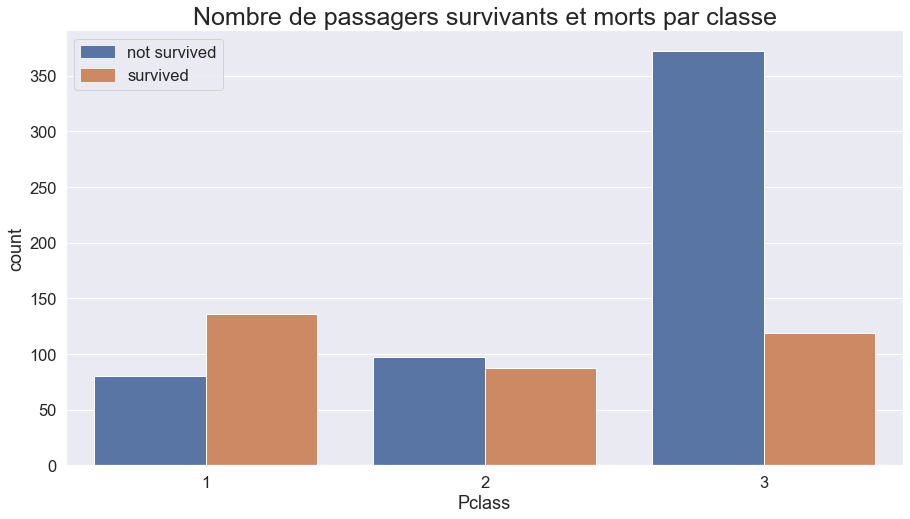

In [381]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par classe", fontsize=25)
sns.countplot(x=merged_df['Pclass'],hue='Survived', data=merged_df)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);


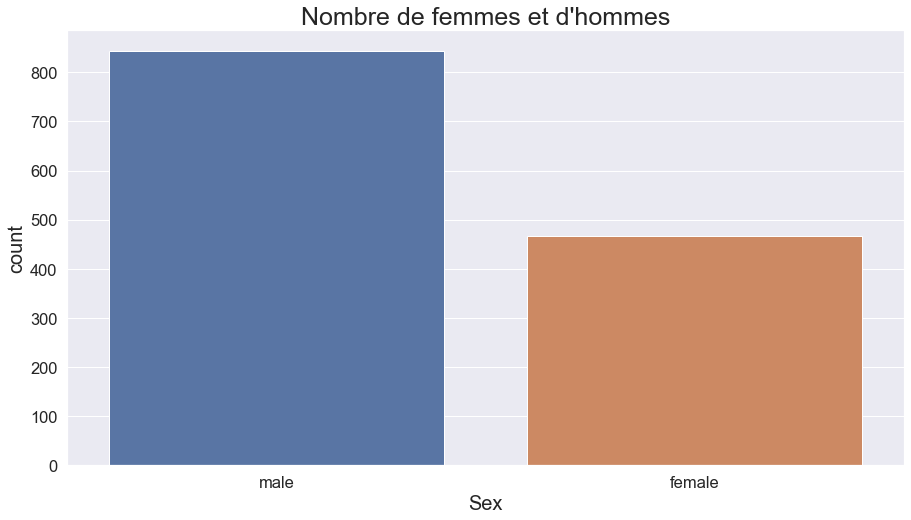

In [382]:
plt.figure(figsize=(15,8))
plt.title("Nombre de femmes et d'hommes" , fontsize=25)
plt.xlabel('Sex',size=20)
plt.ylabel('Count',size=20)
sns.set(font_scale=1.5)
sns.countplot(x='Sex', data=merged_df);


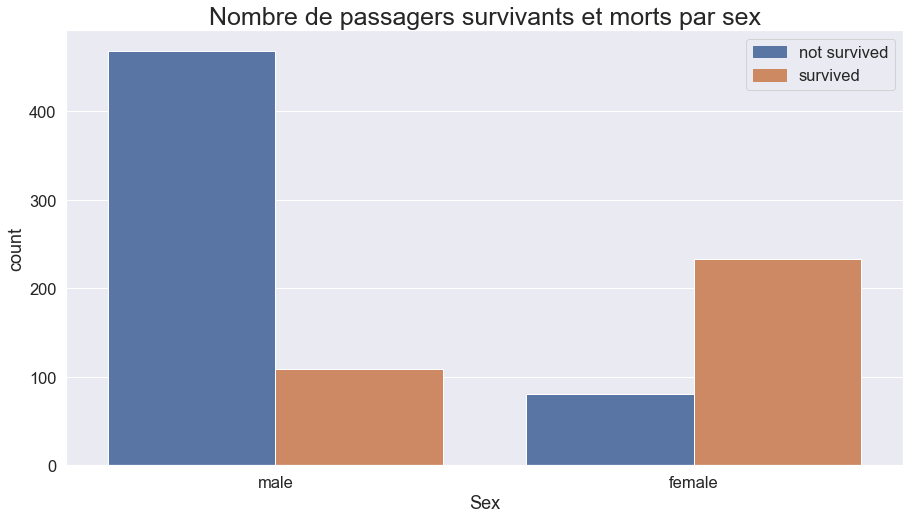

In [383]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par sex", fontsize=25)
sns.countplot(x=merged_df['Sex'],hue='Survived', data=merged_df)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);


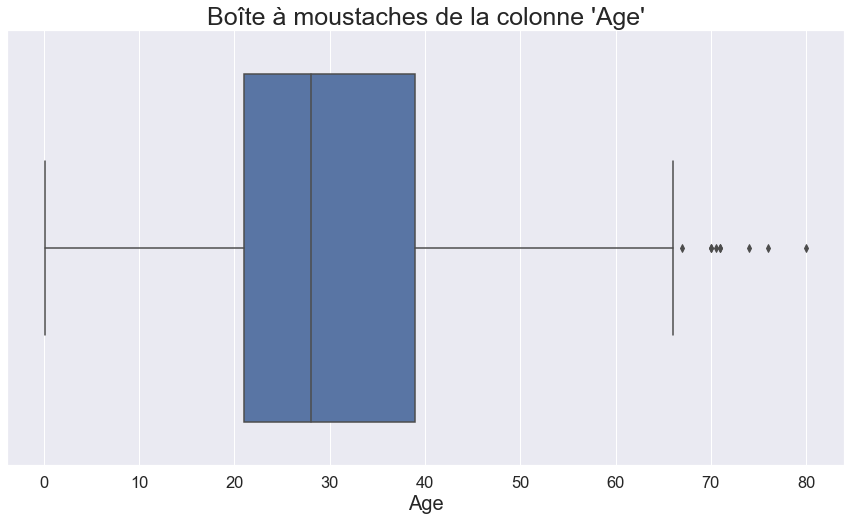

In [384]:
plt.figure(figsize=(15,8))
sns.boxplot(x=merged_df['Age']);
plt.title("Boite à moustaches de la colonne 'Age'" , fontsize=25)
plt.xlabel('Age',size=20);


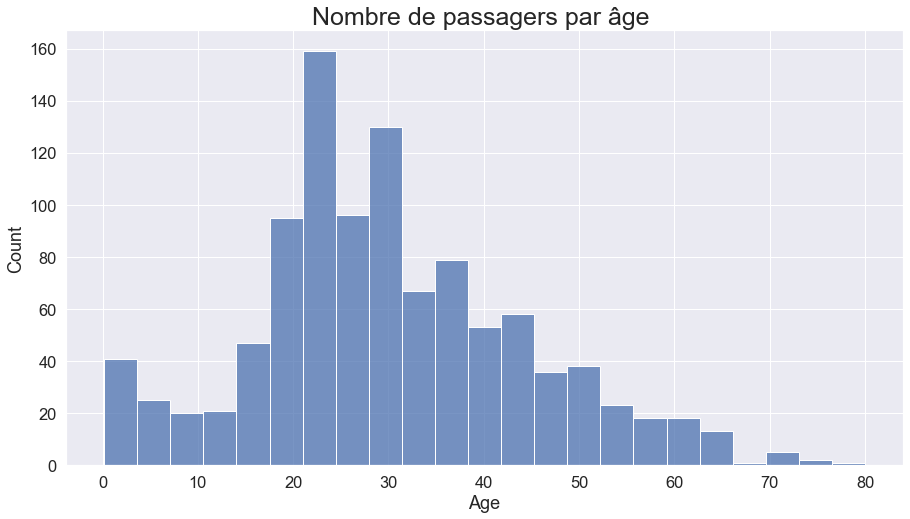

In [385]:
plt.figure(figsize=(15,8))
sns.histplot(merged_df["Age"])
plt.title("Nombre de passagers par age ", fontsize=25);

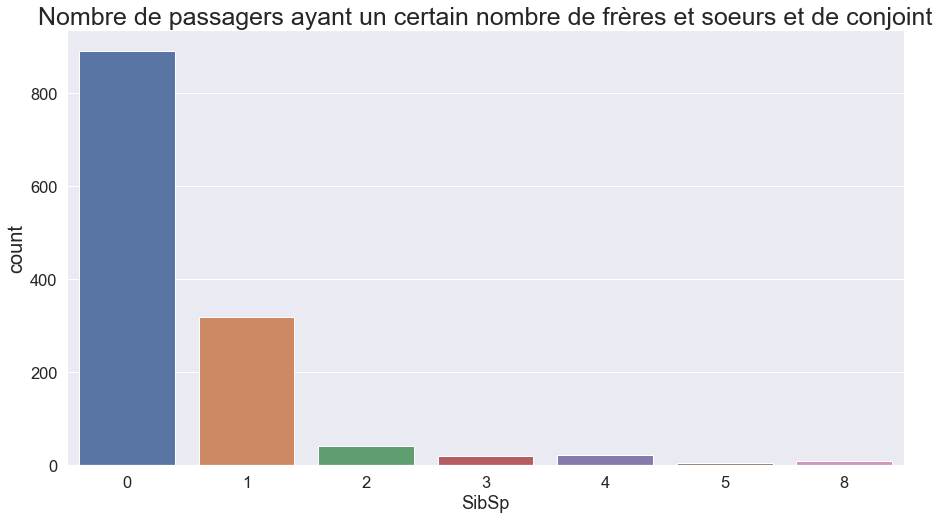

In [386]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers ayant un certain nombre de frères et soeurs et de conjoint" , fontsize=25)
plt.ylabel('Count',size=20)
sns.set(font_scale=1.5)
sns.countplot(x='SibSp', data=merged_df);

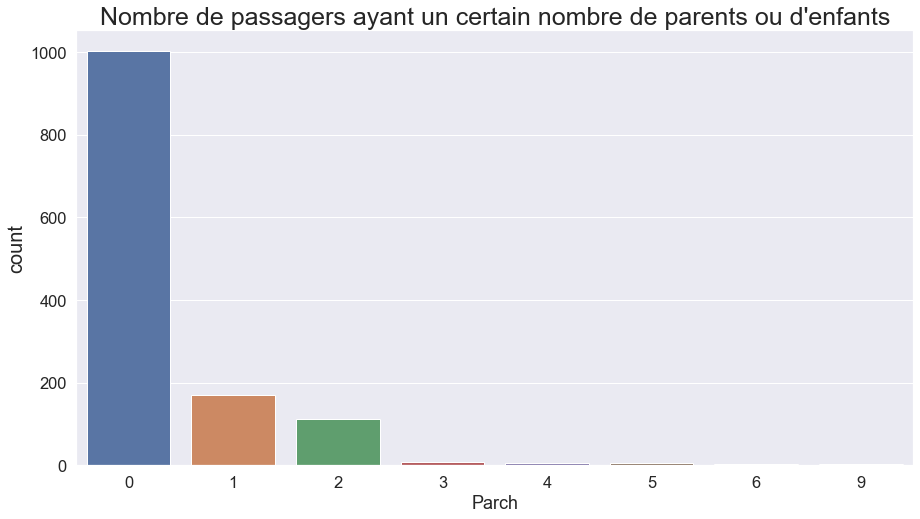

In [387]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers ayant un certain nombre de parents ou d'enfants" , fontsize=25)
plt.ylabel('Count',size=20)
sns.set(font_scale=1.5)
sns.countplot(x='Parch', data=merged_df);

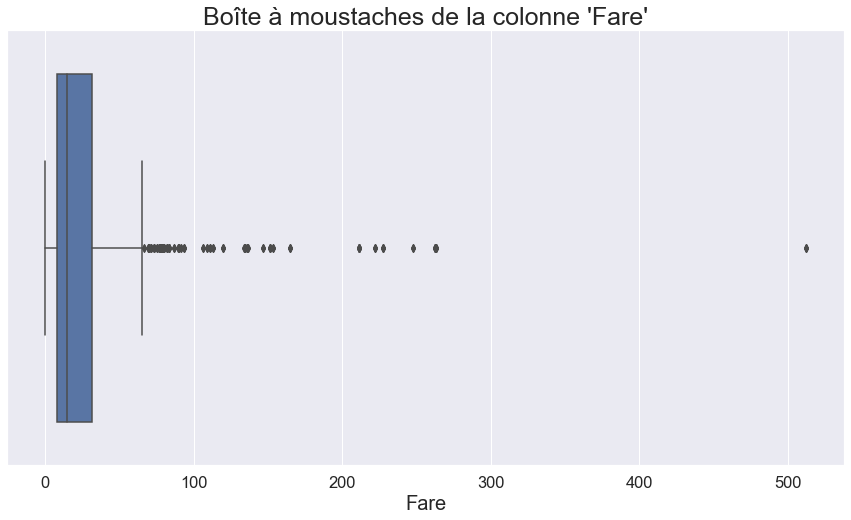

In [388]:
plt.figure(figsize=(15,8))
sns.boxplot(x=merged_df['Fare']);
plt.title("Boite à moustaches de la colonne 'Fare'" , fontsize=25)
plt.xlabel('Fare',size=20);

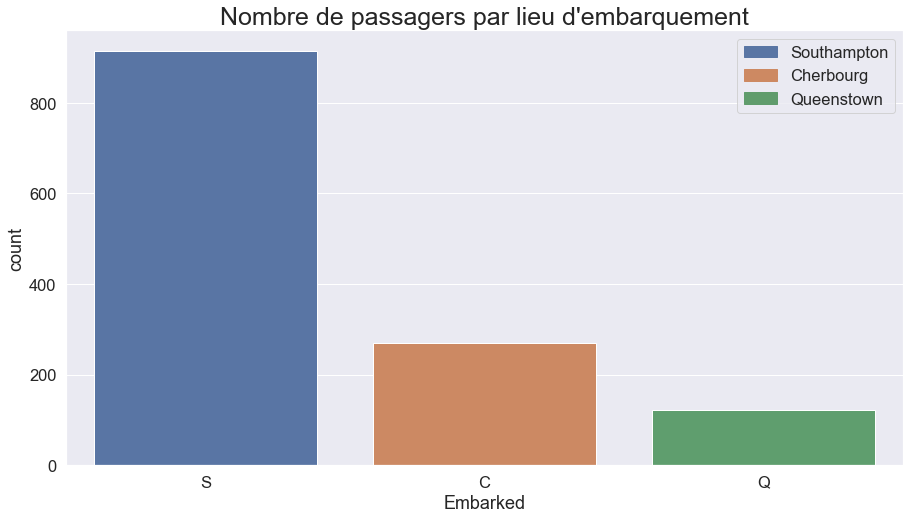

In [389]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers par lieu d'embarquement",fontsize=25)

sns.countplot(x=merged_df['Embarked'], data=merged_df)

colors = {'Southampton':'#5975a4', 'Cherbourg':'#cd8962', 'Queenstown':'#609c6c'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

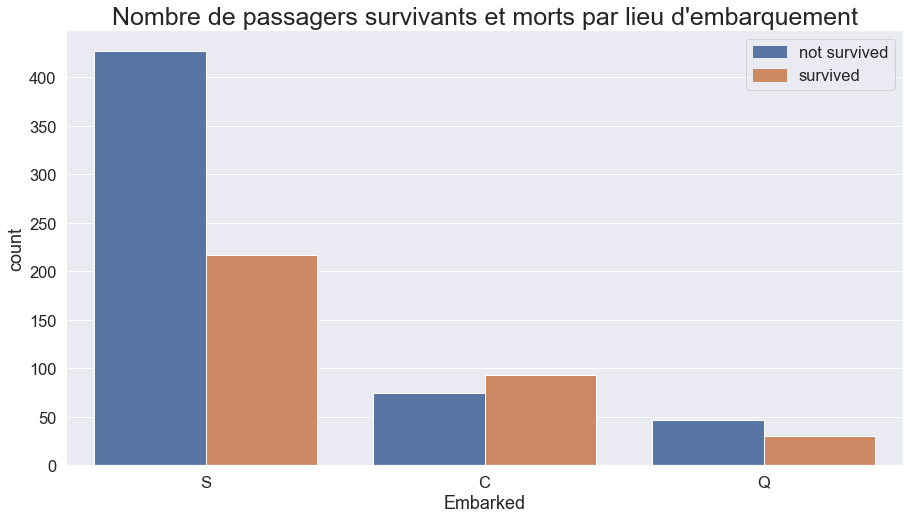

In [390]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par lieu d'embarquement", fontsize=25)

sns.countplot(x=merged_df['Embarked'],hue='Survived', data=merged_df)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

### Visualisation Globale

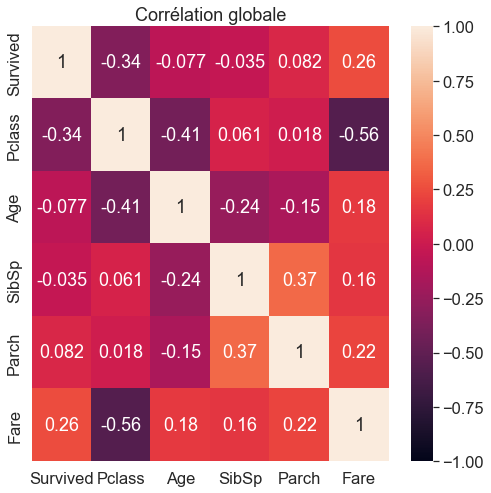

In [391]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(merged_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation globale');

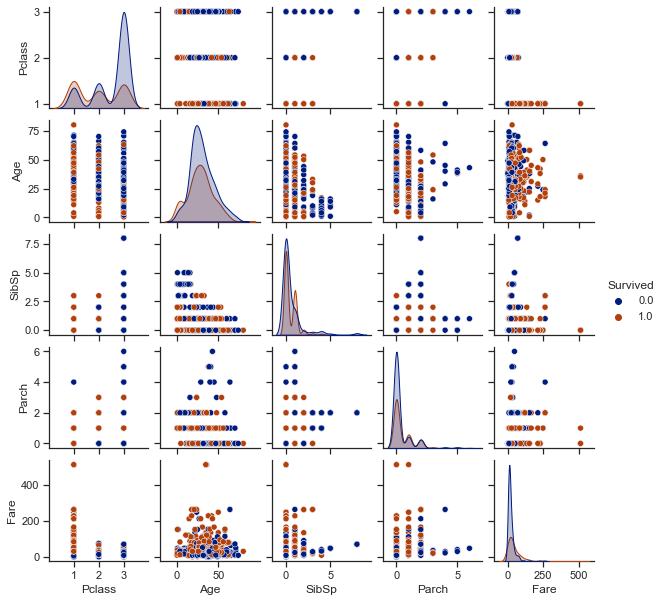

In [392]:
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(merged_df, hue='Survived', palette='dark',height=1.7) 
plt.show();

# Traitement des valeurs manquantes

#### Type et ratio de données manquantes des colonnes

In [393]:
nb_m = merged_df.isnull().sum().sort_values()[:]  
ratio_m = ( merged_df.isnull().sum()/merged_df.shape[0]).sort_values()[:] # ratio of missing values
manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False) 

In [394]:
l=list(manquant.index.values) # list of columns with missing values

df=pd.DataFrame({'Types': merged_df[l].dtypes,
                       'Nb manquants': nb_m,
                      'Ratio manquants%': ratio_m,})
df.drop(index='Survived',inplace=True) # drop the column 'Survived'
df

,Types,Nb manquants,Ratio manquants%
Pclass,int64,0,0.000000
Name,object,0,0.000000
Sex,object,0,0.000000
SibSp,int64,0,0.000000
Parch,int64,0,0.000000
Ticket,object,0,0.000000
Fare,float64,1,0.000764
Embarked,object,2,0.001528
Age,float64,263,0.200917
Cabin,object,1014,0.774637


In [395]:
df_missings = df[df['Nb manquants'] > 0] 
df_missings #columns with missing  values 

,Types,Nb manquants,Ratio manquants%
Fare,float64,1,0.000764
Embarked,object,2,0.001528
Age,float64,263,0.200917
Cabin,object,1014,0.774637


#### On remplace les valeurs manquantes de "Embarked" par la valeur la plus fréquente

In [396]:
merged_df["Embarked"].value_counts() # count the number of passengers per embarked

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [397]:
merged_df["Embarked"].fillna('S', inplace=True) # fill the missing values with 'S'

#### On remplace les valeurs manquantes de "fare" par la médiane de Fare pour la classe 3

In [398]:
merged_df[merged_df['Fare'].isnull()] # find the missing values in the Fare column by the median for class 3

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [399]:
merged_df["Fare"].fillna(merged_df.loc[(merged_df['Pclass'] == 3) ,'Fare'].median(), inplace=True)

#### On remplace les valeurs manquantes de "Age" par la médiane par classe 

In [400]:
pclass_age_median = merged_df.groupby('Pclass')['Age'].transform('median') 
merged_df['Age'].fillna(pclass_age_median , inplace=True)

# Traitement des outliers

#### AGE

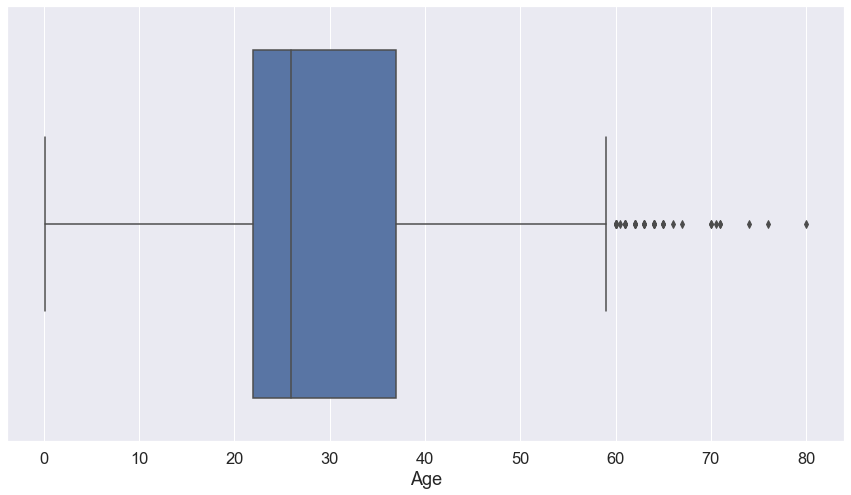

In [401]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(x=merged_df['Age']);


On va supprimer les outliers, c'est-à-dire les valeurs strictements supérieures à 1.9*IQR, au-dessus de Q3.

In [402]:
q3,q1=np.percentile(np.array(merged_df["Age"]),[75,25]) # find the quartiles

In [403]:
IQR=q3-q1 # Interquartile range

In [404]:
palier=IQR*1.9+q3 # find the limits of outliers

In [405]:
idx = merged_df.loc[merged_df["Age"] >palier].index # find the outliers
merged_df.drop(idx , inplace=True) # drop the outliers

In [406]:
merged_df.loc[merged_df["Age"] >palier] # check the outliers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


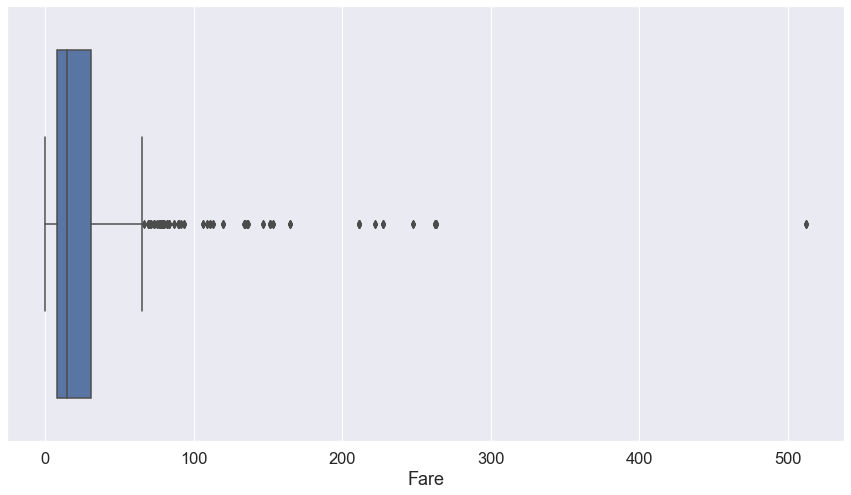

In [407]:
plt.figure(figsize=(15,8))
sns.boxplot(x=merged_df['Fare']);


In [408]:
merged_df.loc[merged_df['Fare'] ==merged_df['Fare'].max()] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


On ne va pas supprimer ces quatre valeurs car ce sont manifestement des vraies informations sur des passagers de 1ère classe.

# Creation de nouvelles colonnes 

#### AgeCategorie

In [409]:
merged_df['AgeCategorie'] = np.where(merged_df['Age'] < 18,'Child', 'Adult') # create a new column with the age category

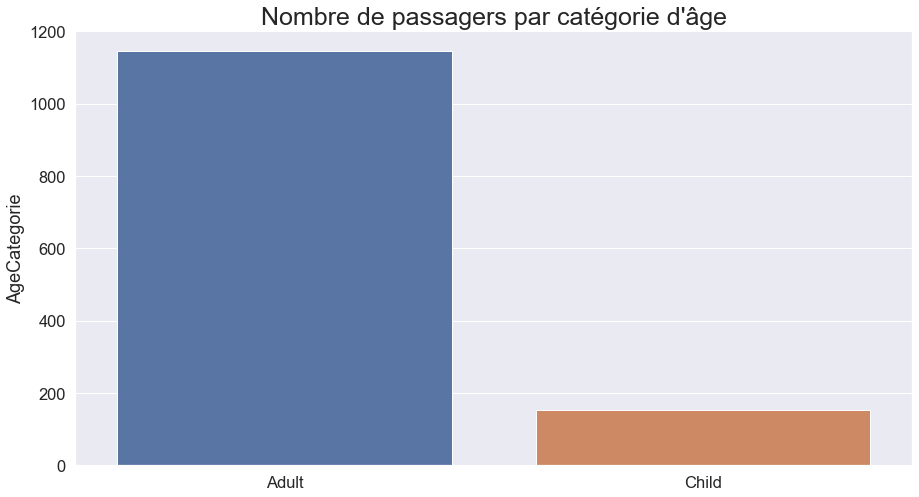

In [410]:
plt.figure(figsize=(15,8))
plt.title('Nombre de passagers par categorie d age', fontsize=25)
sns.barplot(x=merged_df['AgeCategorie'].unique(), y=merged_df['AgeCategorie'].value_counts(), data=merged_df);

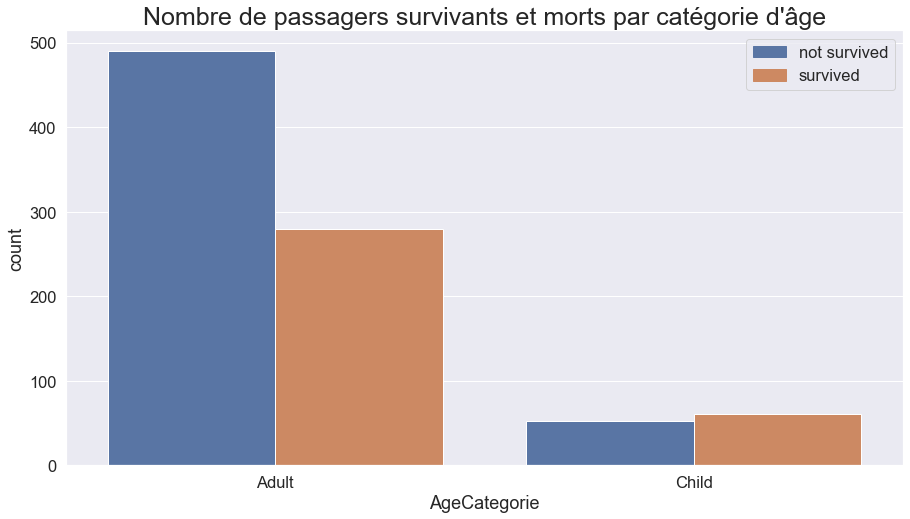

In [411]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par catégorie d'âge", fontsize=25)

sns.countplot(x=merged_df['AgeCategorie'],hue='Survived', data=merged_df)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
;

#### Fare_categorie

In [412]:
merged_df['Fare_categorie']=pd.qcut(merged_df.Fare, 4, labels=['v_low','low','high','v_high']) # create a new column with the fare category

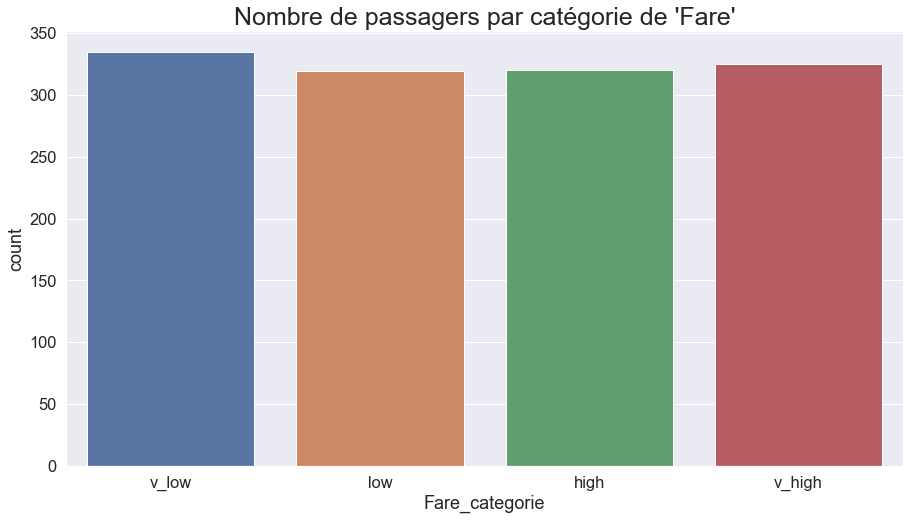

In [413]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers par catégorie de 'Fare'",fontsize=25)
sns.countplot(x=merged_df['Fare_categorie'], data=merged_df);


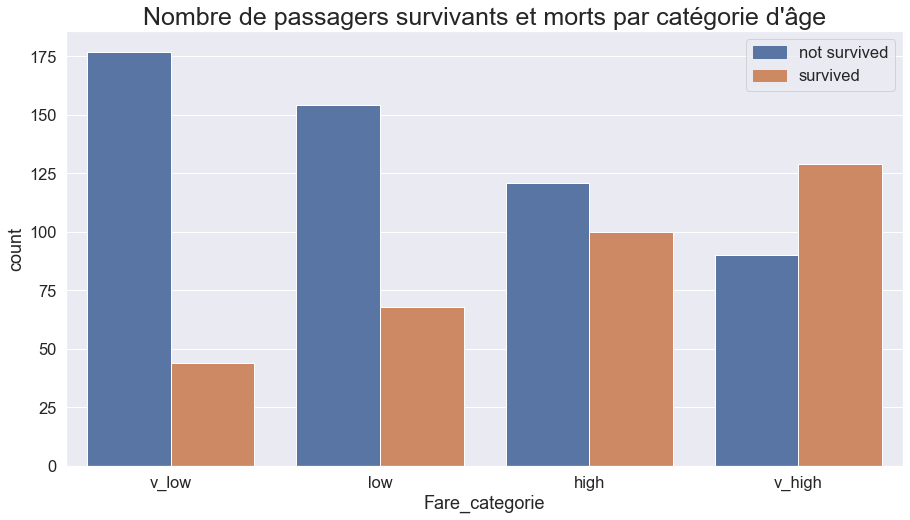

In [414]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par catégorie d'âge", fontsize=25)

sns.countplot(x=merged_df['Fare_categorie'],hue='Survived', data=merged_df)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

#### CabinCategorie

In [415]:
merged_df['Cabin'].unique() # find the unique values in the Cabin column


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90'

##### Les valeurs de la colonne sont très différentes on se contente de garder la lettre de chaque cabine

In [416]:
def cabin_categ(row): 
    """
    Create a new column with the cabin category
    """
    cabin = row['Cabin']
    if pd.notnull(cabin):
        return str(cabin)[0]
    else:
        return 'NN'


In [417]:
merged_df['CabinCategorie']=merged_df.apply(cabin_categ,axis=1) 

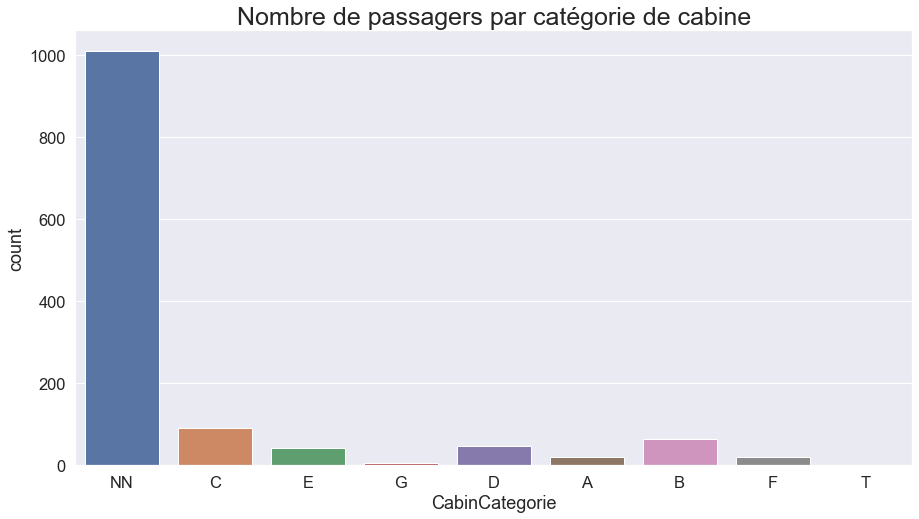

In [418]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers par catégorie de cabine",fontsize=25)

sns.countplot(x=merged_df['CabinCategorie'], data=merged_df);
#plt.savefig("Nombre de pass par cat cab.jpg")

##### Il y a une seule ligne avec T dans la categorie de la cabine on lui associe la valeur nulle

In [419]:
merged_df.loc[merged_df['CabinCategorie']=="T",'CabinCategorie']='NN'

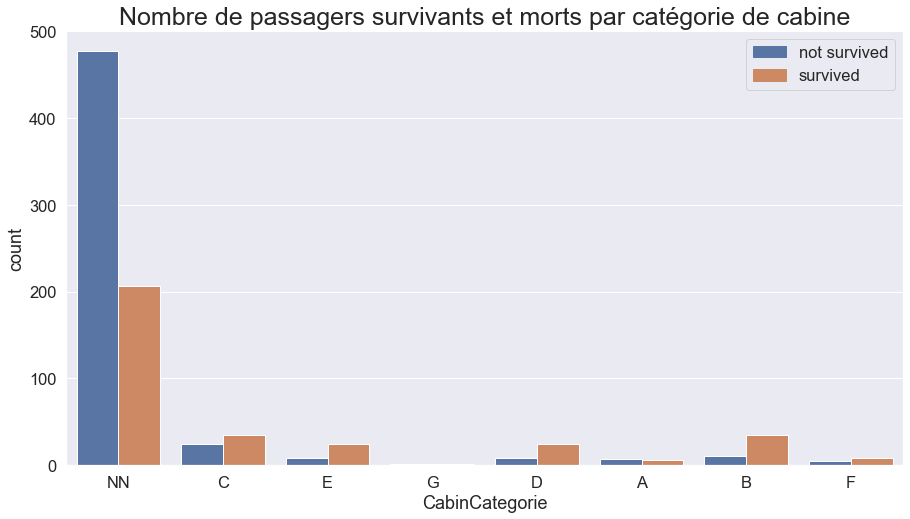

In [420]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par catégorie de cabine", fontsize=25)

sns.countplot(x=merged_df['CabinCategorie'],hue='Survived', data=merged_df)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
;

#### Female

In [52]:
merged_df['female'] = np.where(merged_df['Sex'] == 'female', 1, 0) 

#### Finalisation de la creation des colonnes 

In [53]:
merged_df = pd.get_dummies(merged_df,columns= ['CabinCategorie','Pclass','Fare_categorie','Embarked','AgeCategorie'])

In [54]:
merged_df.drop(['Cabin','Name','Ticket','Sex','Fare'], axis=1, inplace=True) 

In [55]:
merged_df

,Survived,Age,SibSp,Parch,female,CabinCategorie_A,CabinCategorie_B,CabinCategorie_C,CabinCategorie_D,CabinCategorie_E,...,Pclass_3,Fare_categorie_v_low,Fare_categorie_low,Fare_categorie_high,Fare_categorie_v_high,Embarked_C,Embarked_Q,Embarked_S,AgeCategorie_Adult,AgeCategorie_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,22.0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
2,1.0,38.0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
3,1.0,26.0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
4,1.0,35.0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
5,0.0,35.0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,24.0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1306,NaN,39.0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
1307,NaN,38.5,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0


### Créer les datasets de train et de test 

In [56]:
test_dataset=merged_df.loc[merged_df.Survived.isnull()] 

In [57]:
test_dataset.drop('Survived',inplace=True,axis=1) 

In [58]:
test_dataset.to_csv('preprocced_data/preprocessed_test_dataset.csv') # save the preprocessed test dataset

In [59]:
train_dataset=merged_df.loc[merged_df.Survived.notnull()]

In [60]:
train_dataset.to_csv('preprocced_data/preprocessed_train_dataset.csv') # save the preprocessed train dataset

In [61]:
train_dataset['Survived']=train_dataset['Survived'].astype('int64', copy=False)

In [62]:
X = train_dataset.loc[:,'Age':].to_numpy()
y = train_dataset['Survived'].to_numpy()

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # split the train dataset into train and validation sets


In [64]:
test_dataset.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=416)

# Entrainement

##### Pour l'entrainement on le fait d'abord avec des modèles des sklearn avec des paramètres par defaut sur des données standardisées puis sur des données non standardisées. Par la suite on effectue une recherche des meilleurs hyperparametres pour ces modèles avec aussi les deux scénarios; données standardisées et données non standardisées. Finalement on fait voter nos modèles, et on retourne les courbes d'accuracy et de F1-score afin de les comparer.

### Sans recherche d'hyperparametres et sans standardisation des données 

In [65]:
# Dictionary for the accuracy scores, f1 scores, predictions for non standardized data
accu_dict_1 = {}
f1_dict_1 = {}


* **Regression Logistique** 

In [66]:
LR = LogisticRegression(random_state=42,max_iter=1000) 
LR.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [67]:
confusion_matrix(y_val,LR.predict(X_val)) 

array([[89, 24],
       [11, 53]], dtype=int64)

In [68]:
accu_val_hyperparm_1 =accuracy_score(y_val, LR.predict(X_val)) 
accu_dict_1["LR"] = accu_val_hyperparm_1*100
f1score = f1_score(y_val, LR.predict(X_val), average='weighted')
f1_dict_1["LR"]=f1score*100


* **RandomForest**

In [69]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
confusion_matrix(y_val,RF.predict(X_val))

array([[91, 22],
       [14, 50]], dtype=int64)

In [71]:
accu_val_hyperparm_1 =accuracy_score(y_val, RF.predict(X_val))
accu_dict_1["RF"] = accu_val_hyperparm_1*100
f1score = f1_score(y_val, RF.predict(X_val), average='weighted')
f1_dict_1["RF"]=f1score*100

* **Adaboost**

In [72]:
AB=AdaBoostClassifier()
AB.fit(X_train, y_train)


AdaBoostClassifier()

In [73]:
confusion_matrix(y_val,AB.predict(X_val))

array([[89, 24],
       [12, 52]], dtype=int64)

In [74]:
accuracy_score(y_train, AB.predict(X_train))

0.8314447592067988

In [75]:
accu_val_hyperparm_1 =accuracy_score(y_val, AB.predict(X_val))
accu_dict_1["AB"] = accu_val_hyperparm_1*100
f1score = f1_score(y_val, AB.predict(X_val), average='weighted')
f1_dict_1["AB"]=f1score*100

* **SVM**

In [76]:
SVM=svm.SVC(random_state=42)
SVM.fit(X_train, y_train)

SVC(random_state=42)

In [77]:
confusion_matrix(y_val,SVM.predict(X_val))

array([[109,   4],
       [ 59,   5]], dtype=int64)

In [78]:
accuracy_score(y_train, SVM.predict(X_train))

0.6359773371104815

In [79]:
accu_val_hyperparm_1 =accuracy_score(y_val, SVM.predict(X_val))
accu_dict_1["SVM"] = accu_val_hyperparm_1*100
f1score = f1_score(y_val, SVM.predict(X_val), average='weighted')
f1_dict_1["SVM"]=f1score*100

* **Reseaux de neurones** 

In [80]:
RN=MLPClassifier(random_state=42)
RN.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [81]:
confusion_matrix(y_val,RN.predict(X_val))

array([[93, 20],
       [12, 52]], dtype=int64)

In [82]:
accuracy_score(y_train, RN.predict(X_train))

0.8456090651558074

In [83]:
accu_val_hyperparm_1 =accuracy_score(y_val, RN.predict(X_val))
accu_dict_1["RN"] = accu_val_hyperparm_1*100
f1score = f1_score(y_val, RN.predict(X_val), average='weighted')
f1_dict_1["RN"]=f1score*100

* **Decision Tree**

In [84]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [85]:
confusion_matrix(y_val,DT.predict(X_val))

array([[94, 19],
       [15, 49]], dtype=int64)

In [86]:
accuracy_score(y_train, DT.predict(X_train))

0.9617563739376771

In [87]:
accu_val_hyperparm_1 =accuracy_score(y_val, DT.predict(X_val))
accu_dict_1["DT"] = accu_val_hyperparm_1*100
f1score = f1_score(y_val, DT.predict(X_val), average='weighted')
f1_dict_1["DT"]=f1score*100

* **Gradient Boosting**

In [88]:
GB=GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [89]:
confusion_matrix(y_val,GB.predict(X_val))

array([[98, 15],
       [16, 48]], dtype=int64)

In [90]:
accuracy_score(y_train, GB.predict(X_train))

0.8838526912181303

In [91]:
accu_val_hyperparm_1 =accuracy_score(y_val, GB.predict(X_val))
accu_dict_1["GB"] = accu_val_hyperparm_1*100
f1score = f1_score(y_val, GB.predict(X_val), average='weighted')
f1_dict_1["GB"]=f1score*100

* **KNN**

In [92]:
KNN=KNeighborsClassifier()

In [93]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
confusion_matrix(y_val,KNN.predict(X_val))

array([[97, 16],
       [19, 45]], dtype=int64)

In [95]:
accuracy_score(y_train, KNN.predict(X_train))

0.8371104815864022

In [96]:
accu_val_hyperparm_1 =accuracy_score(y_val, KNN.predict(X_val))
accu_dict_1["KNN"] = accu_val_hyperparm_1*100
f1score = f1_score(y_val, KNN.predict(X_val), average='weighted')
f1_dict_1["KNN"]=f1score*100

In [97]:
df_accu_1 = pd.DataFrame.from_dict(accu_dict_1, orient='index', columns=['Accuracy'])
df_f1_1 = pd.DataFrame.from_dict(f1_dict_1, orient='index', columns=['F1_score'])

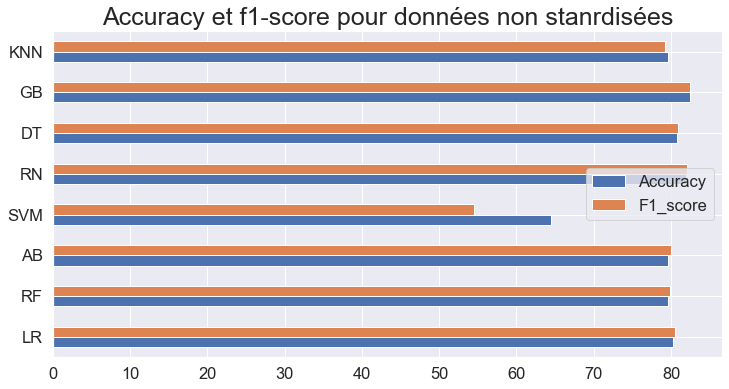

In [98]:
df_final_1 = pd.concat([df_accu_1,df_f1_1],axis=1)
df_final_1.plot.barh(y=["Accuracy","F1_score"],figsize=(12,6))

plt.title("Accuracy et f1-score pour données non stanrdisées", fontsize=25);

In [99]:
df_accu_1.sort_values(by='Accuracy',ascending=False)

,Accuracy
GB,82.485876
RN,81.920904
DT,80.790960
LR,80.225989
RF,79.661017
AB,79.661017
KNN,79.661017
SVM,64.406780


''

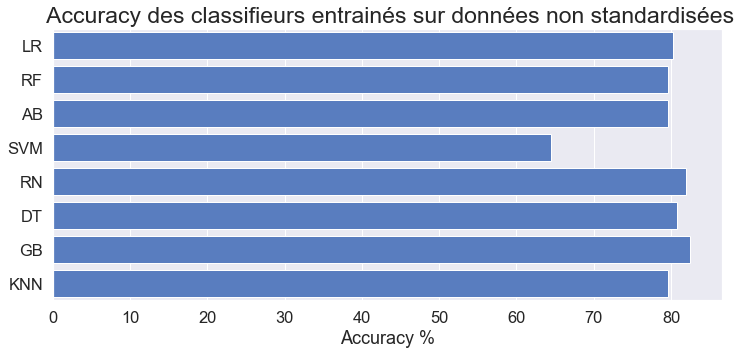

In [100]:
plt.figure(figsize=(12,5))
sns.set_color_codes("muted")
sns.barplot(data=df_accu_1, x="Accuracy", y=df_accu_1.index, color="b")
plt.xlabel('Accuracy %')
plt.title(' Accuracy des classifieurs entrainés sur données non standardisées', fontsize=23)
;
#plt.savefig("Accu data nn stand.jpg")

### Standardisation des donnees et réentraimenent des modeles 

In [101]:
ss= StandardScaler() # standardize the data
X_train_ss= ss.fit_transform(X_train) # fit the scaler to the training data
X_val_ss = ss.transform(X_val) # transform the validation data

In [102]:
# Dictionary for the accuracy scores, f1 scores, predictions for standardized data
accu_dict_2 = {}
f1_dict_2 = {}


* **Regression Logistique** 

In [103]:
LR_ss = LogisticRegression(random_state=42)
LR_ss.fit(X_train_ss,y_train)


LogisticRegression(random_state=42)

In [104]:
accuracy_score(y_train, LR_ss.predict(X_train_ss))

0.8101983002832861

In [105]:
accu_val_hyperparm_2 =accuracy_score(y_val, LR_ss.predict(X_val_ss)) 
accu_dict_2["LR"] = accu_val_hyperparm_2*100
f1score = f1_score(y_val, LR_ss.predict(X_val_ss), average='weighted')
f1_dict_2["LR"]=f1score*100

In [106]:
confusion_matrix(y_val,LR_ss.predict(X_val_ss))

array([[89, 24],
       [11, 53]], dtype=int64)

* **RandomForest**

In [107]:
RF_ss = RandomForestClassifier(random_state=42)
RF_ss.fit(X_train_ss, y_train)

RandomForestClassifier(random_state=42)

In [108]:
accuracy_score(y_train, RF_ss.predict(X_train_ss))

0.9617563739376771

In [109]:
accu_val_hyperparm_2=accuracy_score(y_val, RF_ss.predict(X_val_ss))
accu_dict_2["RF"] = accu_val_hyperparm_2*100
f1score = f1_score(y_val, RF_ss.predict(X_val_ss), average='weighted')
f1_dict_2["RF"]=f1score*100

In [110]:
accuracy_score(y_val, RF_ss.predict(X_val_ss))

0.7966101694915254

In [111]:
confusion_matrix(y_val,RF_ss.predict(X_val_ss))

array([[91, 22],
       [14, 50]], dtype=int64)

* **Adaboost**

In [112]:
AB_ss=AdaBoostClassifier(random_state=42)
AB_ss.fit(X_train_ss, y_train)

AdaBoostClassifier(random_state=42)

In [113]:
accuracy_score(y_train, AB_ss.predict(X_train_ss))

0.8314447592067988

In [114]:
accu_val_hyperparm_2=accuracy_score(y_val, AB_ss.predict(X_val_ss))
accu_dict_2["AB"] = accu_val_hyperparm_2*100
f1score = f1_score(y_val, AB_ss.predict(X_val_ss), average='weighted')
f1_dict_2["AB"]=f1score*100

In [115]:
confusion_matrix(y_val,AB_ss.predict(X_val_ss))

array([[89, 24],
       [12, 52]], dtype=int64)

* **SVM**

In [116]:
SVM_ss=svm.SVC(random_state=42)
SVM_ss.fit(X_train_ss, y_train)

SVC(random_state=42)

In [117]:
accuracy_score(y_train, SVM_ss.predict(X_train_ss))

0.8569405099150141

In [118]:
accuracy_score(y_val, SVM_ss.predict(X_val_ss))

0.847457627118644

In [119]:
accu_val_hyperparm_2=accuracy_score(y_val, SVM_ss.predict(X_val_ss))
accu_dict_2["SVM"] = accu_val_hyperparm_2*100
f1score = f1_score(y_val, SVM_ss.predict(X_val_ss), average='weighted')
f1_dict_2["SVM"]=f1score*100

In [120]:
# We get better results with the standardized data for the SVM

In [121]:
confusion_matrix(y_val,SVM_ss.predict(X_val_ss))

array([[101,  12],
       [ 15,  49]], dtype=int64)

**Réseaux de neurones** 

In [122]:
RN_ss=MLPClassifier(random_state=42)
RN_ss.fit(X_train_ss, y_train)

MLPClassifier(random_state=42)

In [123]:
confusion_matrix(y_val,RN_ss.predict(X_val_ss))

array([[96, 17],
       [18, 46]], dtype=int64)

In [124]:
accuracy_score(y_train, RN_ss.predict(X_train_ss))

0.8923512747875354

In [125]:
accu_val_hyperparm_2=accuracy_score(y_val, RN_ss.predict(X_val_ss))
accu_dict_2["RN"] = accu_val_hyperparm_2*100
f1score = f1_score(y_val, RN_ss.predict(X_val_ss), average='weighted')
f1_dict_2["RN"]=f1score*100

* **Decision Tree**

In [126]:
DT_ss = DecisionTreeClassifier(random_state=42)
DT_ss.fit(X_train_ss, y_train)

DecisionTreeClassifier(random_state=42)

In [127]:
confusion_matrix(y_val,DT_ss.predict(X_val_ss))

array([[94, 19],
       [15, 49]], dtype=int64)

In [128]:
accuracy_score(y_train, DT_ss.predict(X_train_ss))

0.9617563739376771

In [129]:
accu_val_hyperparm_2=accuracy_score(y_val, DT_ss.predict(X_val_ss))
accu_dict_2["DT"] = accu_val_hyperparm_2*100
f1score = f1_score(y_val, DT_ss.predict(X_val_ss), average='weighted')
f1_dict_2["DT"]=f1score*100

* **Gradient Boosting**

In [130]:
GB_ss=GradientBoostingClassifier()


In [131]:
GB_ss.fit(X_train_ss, y_train)

GradientBoostingClassifier()

In [132]:
confusion_matrix(y_val,GB_ss.predict(X_val_ss))

array([[98, 15],
       [16, 48]], dtype=int64)

In [133]:
accuracy_score(y_train, GB_ss.predict(X_train_ss))

0.8838526912181303

In [134]:
accu_val_hyperparm_2=accuracy_score(y_val, GB_ss.predict(X_val_ss))
accu_dict_2["GB"] = accu_val_hyperparm_2*100
f1score = f1_score(y_val, GB_ss.predict(X_val_ss), average='weighted')
f1_dict_2["GB"]=f1score*100

* **KNN**

In [135]:
KNN_ss=KNeighborsClassifier()

In [136]:
KNN_ss.fit(X_train_ss, y_train)

KNeighborsClassifier()

In [137]:
confusion_matrix(y_val,KNN_ss.predict(X_val_ss))

array([[92, 21],
       [14, 50]], dtype=int64)

In [138]:
accuracy_score(y_train, KNN_ss.predict(X_train_ss))

0.8555240793201133

In [139]:
accu_val_hyperparm_2=accuracy_score(y_val, KNN_ss.predict(X_val_ss))
accu_dict_2["KNN"] = accu_val_hyperparm_2*100
f1score = f1_score(y_val, KNN_ss.predict(X_val_ss), average='weighted')
f1_dict_2["KNN"]=f1score*100

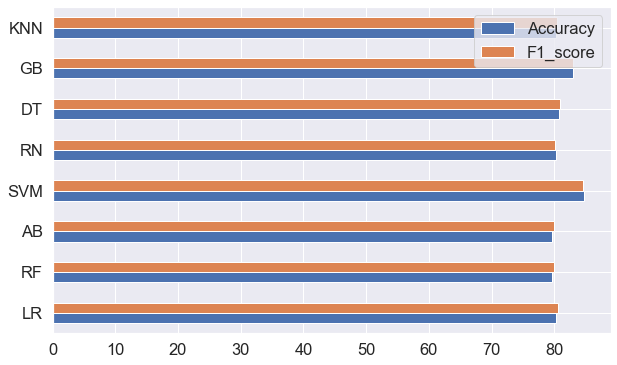

In [140]:
df_accu_2 = pd.DataFrame.from_dict(accu_dict_2, orient='index', columns=['Accuracy'])
df_f1_2 = pd.DataFrame.from_dict(f1_dict_2, orient='index', columns=['F1_score'])
df_final_2 = pd.concat([df_accu_2,df_f1_2],axis=1)
df_final_2.plot.barh(y=["Accuracy","F1_score"],figsize=(10,6));

In [141]:
df_accu_2.sort_values(by='Accuracy',ascending=False)

,Accuracy
SVM,84.745763
GB,83.050847
DT,80.790960
LR,80.225989
RN,80.225989
KNN,80.225989
RF,79.661017
AB,79.661017


Text(0.5, 1.0, ' Accuracy des classifieurs entrainés sur données standardisées')

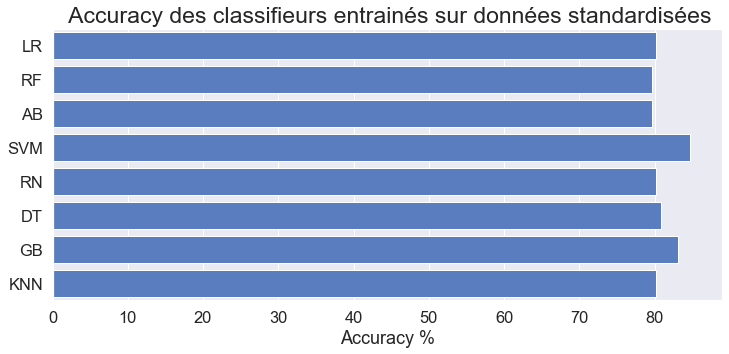

In [142]:
plt.figure(figsize=(12,5))
sns.set_color_codes("muted")
sns.barplot(data=df_accu_2, x="Accuracy", y=df_accu_2.index, color="b")
plt.xlabel('Accuracy %')
plt.title(' Accuracy des classifieurs entrainés sur données standardisées', fontsize=23)

''

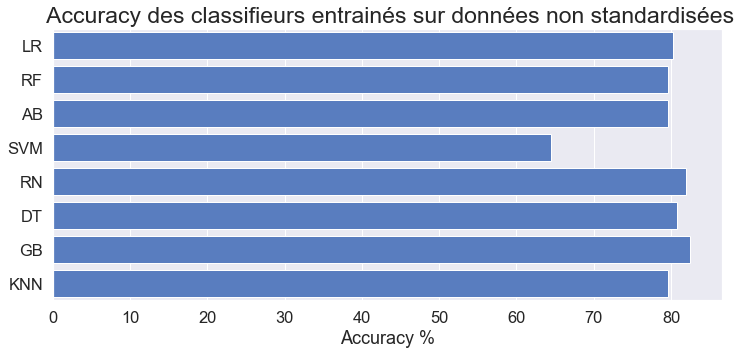

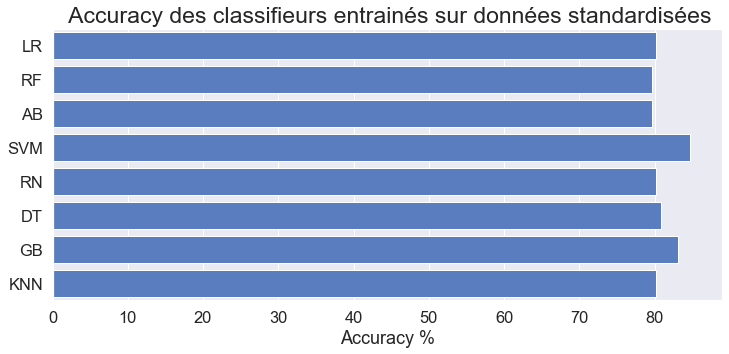

In [143]:
plt.figure(figsize=(12,5))
sns.set_color_codes("muted")
sns.barplot(data=df_accu_1, x="Accuracy", y=df_accu_1.index, color="b")
plt.xlabel('Accuracy %')
plt.title(' Accuracy des classifieurs entrainés sur données non standardisées', fontsize=23)

plt.figure(figsize=(12,5))
sns.set_color_codes("muted")
sns.barplot(data=df_accu_2, x="Accuracy", y=df_accu_2.index, color="b")
plt.xlabel('Accuracy %')
plt.title(' Accuracy des classifieurs entrainés sur données standardisées', fontsize=23)
;

##### Aprés l'entrainement des classifieurs sur données standardisées et données non standardisées, on affiche les courbes d'accuracy. On remarque pour des données non standardisées la meilleure accuracy (82.48%) est pour le gradient boosting, cependant le SVM est le pire modèle (64.40%). Avec des données stanrdisées, le SVM devient le meilleur (84,74%), le gradient boosting s'améliore (83,05%), et le KNN aussi (80.22%). Néanmoins, random forest, adaboost, decision tree, logistique régression garde les même accuracy. On en conclut donc que pour le SVM, la standardisation des données permet d'augementer l'accuracy. 




## Recherche d'hyperparametre

##### Pour chaque classifieur, on l'entraine sur des données non standardisées puis sur des données standardisées et on calcule l'accuracy et le f1-score sur les données de validation et on fait la prediction sur les données de test.

In [144]:
# Dictionary for the accuracy scores, f1 scores, predictions for non standardized data
accu_dict = {}
f1_dict = {}
pred_dict = {}

In [145]:
# Dictionary for the accuracy scores, f1 scores, predictions for standardized data
accu_dict_ss = {}
f1_dict_ss = {}
pred_dict_ss = {}

* **Regression Logistique : données non standardisées** 

In [146]:
LogisticRegression_param = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l2','none'],
    'tol': np.linspace(10**-6,10**-2,10)
}

In [147]:
lr= GridSearchCV(LR,LogisticRegression_param, verbose=1, n_jobs=-1) 

In [148]:
lr_best =lr.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 985 out of 1000 | elapsed:   20.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   21.0s finished


In [149]:
lr.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 1e-06}

In [150]:
lr.best_score_

0.8030266706622715

In [151]:
accu_val_hyperparm = accuracy_score(y_val, lr_best.predict(X_val))

In [152]:
accu_dict["LR"] = accu_val_hyperparm*100

In [153]:
f1score = f1_score(y_val, lr_best.predict(X_val), average='weighted')

In [154]:
f1_dict["LR"]=f1score*100

In [155]:
lr_pred_label=lr_best.predict(test_dataset) # prediction on test dataset 
pred_dict["Logistic Regression"] = lr_pred_label #adding predictions to pred_dict
df_pred = pd.DataFrame.from_dict(pred_dict)


* **Regression Logistique : données standardisées** 

In [156]:
lr_best_ss=lr.fit(X_train_ss, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 969 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.5s finished


In [157]:
lr_best_ss.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 1e-06}

In [158]:
lr_best_ss.best_score_

0.7987913295375086

In [159]:
accu_val_hyperparm_ss = accuracy_score(y_val, lr_best_ss.predict(X_val_ss))

In [160]:
accu_dict_ss["LR"] = accu_val_hyperparm_ss*100

In [161]:
f1score = f1_score(y_val, lr_best_ss.predict(X_val_ss), average='weighted')

In [162]:
f1_dict_ss["LR"]=f1score*100

In [163]:
lr_pred_label_ss=lr_best_ss.predict(test_dataset)
pred_dict_ss["Logistic Regression"] = lr_pred_label_ss
df_pred_ss = pd.DataFrame.from_dict(pred_dict_ss)


* **Random Forest : données non standardisées** 

In [164]:
randForest_param = {
    'n_estimators': [10, 50, 100],   
    'max_depth': [None, 300, 500, 1000],   
    'min_samples_leaf': [1, 2, 3],   
    'min_samples_split': [4, 5, 6, 7, 8],
    
    'max_features': ['log2', 'sqrt'],
    'criterion': ['gini', 'entropy']

}

In [165]:
rf = GridSearchCV(RF, randForest_param, verbose=1, n_jobs=-1)

In [166]:
rf_best=rf.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  2.8min finished


In [167]:
rf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [168]:
rf.best_score_

0.8370392568175007

In [169]:
accu_val_hyperparm = accuracy_score(y_val, rf_best.predict(X_val))

In [170]:
accu_dict["Random Forest"] = accu_val_hyperparm*100

In [171]:
f1score = f1_score(y_val, rf_best.predict(X_val), average='weighted')
f1_dict["Random Forest"]=f1score*100

In [172]:
rf_pred_label=rf_best.predict(test_dataset)# prediction on test dataset 
pred_dict["Random Forest"] = rf_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


* **Random Forest : données standardisées** 

In [173]:
rf_best_ss=rf.fit(X_train_ss, y_train)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  2.3min finished


In [174]:
rf_best_ss.best_score_

0.8327939266806513

In [175]:
rf_best_ss.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [176]:
accu_val_hyperparm_ss = accuracy_score(y_val, rf_best_ss.predict(X_val_ss))

In [177]:
accu_dict_ss["Random Forest"] = accu_val_hyperparm_ss*100

In [178]:
f1score = f1_score(y_val, rf_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["Random Forest"]=f1score*100

In [179]:
rf_pred_label_ss=rf_best_ss.predict(test_dataset)
pred_dict_ss["Random Forest"] = rf_pred_label_ss
df_pred_ss = pd.DataFrame.from_dict(pred_dict_ss)


* **Adaboost : données non standardisées** 

In [180]:
adaboost_param = {
    'n_estimators': np.arange(10, 60, 10),
    'learning_rate': [0.5 , 1, 1.5 ,2]
}

In [181]:
ad = GridSearchCV(AB,adaboost_param, verbose=1, n_jobs=-1)

In [182]:
best_ad=ad.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


In [183]:
ad.best_params_

{'learning_rate': 1.5, 'n_estimators': 20}

In [184]:
ad.best_score_

0.8172510238737388

In [185]:
accu_val_hyperparm=accuracy_score(y_val, best_ad.predict(X_val))

In [186]:
accu_dict["AdaBoost"] = accu_val_hyperparm*100

In [187]:
f1score = f1_score(y_val, best_ad.predict(X_val), average='weighted')
f1_dict["AdaBoost"]=f1score*100

In [188]:
ad_pred_label=best_ad.predict(test_dataset)# prediction on test dataset 
pred_dict["AdaBoost"] = ad_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


* **Adaboost : données standardisées** 

In [189]:
ad_best_ss=ad.fit(X_train_ss, y_train)
ad_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, ad_best_ss.predict(X_val_ss))
accu_dict_ss["Adaboost"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, ad_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["Adaboost"]=f1score*100

ad_pred_label_ss=ad_best_ss.predict(test_dataset)# prediction on test dataset 
pred_dict_ss["AdaBoost"] = ad_pred_label_ss
df_pred_ss = pd.DataFrame.from_dict(pred_dict_ss)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished


* **SVM : données non standardisées** 

In [190]:
SVM_param = {
   'kernel': ['rbf', 'sigmoid','linear'],
    'gamma': [0.00001, 0.0001, 0.001, 0.004, 0.007, 0.01, 0.02, 0.05]
}

In [191]:
svm_= GridSearchCV(SVM,SVM_param, verbose=1,n_jobs=-1)

In [192]:
best_svm=svm_.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.1s finished


In [193]:
svm_.best_params_

{'gamma': 0.05, 'kernel': 'rbf'}

In [194]:
svm_.best_score_

0.793137548696434

In [195]:
accu_val_hyperparm=accuracy_score(y_val, best_svm.predict(X_val))

In [196]:
accu_dict["SVM"] = accu_val_hyperparm*100

In [197]:
f1score = f1_score(y_val, best_svm.predict(X_val), average='weighted')
f1_dict["SVM"]=f1score*100

In [198]:
svm_pred_label=best_svm.predict(test_dataset) # prediction on test dataset 
pred_dict["SVM"] = svm_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


* **Adaboost : données standardisées** 

In [199]:
svm_best_ss=svm_.fit(X_train_ss, y_train)
svm_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, svm_best_ss.predict(X_val_ss))
accu_dict_ss["SVM"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, svm_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["SVM"]=f1score*100

svm_pred_label_ss=svm_best_ss.predict(test_dataset) # prediction on test dataset 
pred_dict_ss["SVM"] = svm_pred_label_ss
df_pred_ss = pd.DataFrame.from_dict(pred_dict_ss)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.8s finished


* **Réseaux de neurones: données non standardisées** 

In [200]:
NN_param = {
    'hidden_layer_sizes': np.arange(105,115,1),
    'learning_rate_init': np.arange(0.0001, .5, 0.1),
    'solver': ['sgd','adam'],

}

In [201]:
rn=GridSearchCV(RN,NN_param, verbose=1, n_jobs=-1)

In [202]:
best_rn=rn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished


In [203]:
rn.best_params_

{'hidden_layer_sizes': 110,
 'learning_rate_init': 0.10010000000000001,
 'solver': 'adam'}

In [204]:
rn.best_score_

0.825731695135351

In [205]:
accu_val_hyperparm=accuracy_score(y_val, best_rn.predict(X_val))

In [206]:
accu_dict["RN"] = accu_val_hyperparm*100

In [207]:
f1score = f1_score(y_val, best_rn.predict(X_val), average='weighted')
f1_dict["RN"]=f1score*100

In [208]:
rn_pred_label=best_rn.predict(test_dataset) # prediction on test dataset 
pred_dict["RN"] = rn_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


* **Réseaux de neurones: données standardisées** 

In [209]:
rn_best_ss=rn.fit(X_train_ss, y_train)
rn_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, rn_best_ss.predict(X_val_ss))
accu_dict_ss["RN"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, rn_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["RN"]=f1score*100

rn_pred_label_ss=rn_best_ss.predict(test_dataset) # prediction on test dataset 
pred_dict_ss["RN"] = rn_pred_label_ss
df_pred_ss = pd.DataFrame.from_dict(pred_dict_ss)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


* **Decision Tree: données non standardisées**

In [210]:
DTS_param = {
    'max_depth': [None,1,5, 10, 50, 100],
    'min_samples_leaf': list(range(2, 6)),
    'criterion': ['gini', 'entropy']
}

In [211]:
dt= GridSearchCV(DT,DTS_param,verbose=1,n_jobs=-1)

In [212]:
best_dt=dt.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.3s finished


In [213]:
dt.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4}

In [214]:
dt.best_score_

0.8172710018979122

In [215]:
accu_dict["DT"] = accu_val_hyperparm*100

In [216]:
f1score = f1_score(y_val,best_dt.predict(X_val), average='weighted')
f1_dict["DT"]=f1score*100

In [217]:
dt_pred_label=best_dt.predict(test_dataset)# prediction on test dataset 
pred_dict["Decision tree"] = dt_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


* **Decision Tree: données standardisées**

In [218]:
dt_best_ss=dt.fit(X_train_ss, y_train)
dt_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, dt_best_ss.predict(X_val_ss))
accu_dict_ss["Decision tree"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, dt_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["Decision tree"]=f1score*100

dt_pred_label_ss=dt_best_ss.predict(test_dataset)# prediction on test dataset 
pred_dict_ss["Decision tree"] = dt_pred_label_ss
df_pred_ss = pd.DataFrame.from_dict(pred_dict_ss)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.4s finished


* **Gradient Boosting: données non standardisées**

In [219]:
 GB_param = {
    "learning_rate": [0.01, 0.05, 0.075, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 5),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    "max_depth":[3,5,8],
    "max_features":[None,"log2","sqrt"],
    }

In [220]:
GB= GridSearchCV(GradientBoostingClassifier(),GB_param,verbose=1,n_jobs=-1)

In [221]:
best_GB= GB.fit(X_train, y_train)

Fitting 5 folds for each of 1125 candidates, totalling 5625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5625 out of 5625 | elapsed:  2.0min finished


In [222]:
GB.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.30000000000000004}

In [223]:
GB.best_score_

0.8243032664069523

In [224]:
accu_val_hyperparm=accuracy_score(y_val, best_GB.predict(X_val))

In [225]:
accu_dict["GB"] = accu_val_hyperparm*100

In [226]:
f1score = f1_score(y_val,best_GB.predict(X_val), average='weighted')
f1_dict["GB"]=f1score*100

In [227]:
gb_pred_label=best_GB.predict(test_dataset) # prediction on test dataset 
pred_dict["Gradient boosting"] = gb_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


* **Gradient Boosting: données standardisées**

In [228]:
gb_best_ss=GB.fit(X_train_ss, y_train)
gb_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, gb_best_ss.predict(X_val_ss))
accu_dict_ss["GB"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, gb_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["GB"]=f1score*100

gb_pred_label_ss=gb_best_ss.predict(test_dataset) # prediction on test dataset 
pred_dict_ss["Gradient boosting"] = gb_pred_label_ss
df_pred_ss = pd.DataFrame.from_dict(pred_dict_ss)


Fitting 5 folds for each of 1125 candidates, totalling 5625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5625 out of 5625 | elapsed:  2.1min finished


* **KNN: données non standardisées**

In [229]:
KNN_param = {
    'n_neighbors': list(range(1, 40)),
    'leaf_size': list(range(1, 40)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

In [230]:
KNN= GridSearchCV(KNeighborsClassifier(),KNN_param,verbose=1,n_jobs=-1)

In [231]:
best_knn= KNN.fit(X_train, y_train)

Fitting 5 folds for each of 9126 candidates, totalling 45630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 3632 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 7232 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 11632 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 16832 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 22832 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 29632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 37232 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 45630 out of 45630 | elapsed:  2.1min finished


In [232]:
KNN.best_score_

0.7973928678453701

In [233]:
KNN.best_params_


{'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 9,
 'weights': 'distance'}

In [234]:
accu_val_hyperparm=accuracy_score(y_val, best_knn.predict(X_val))

In [235]:
accu_dict["Knn"] = accu_val_hyperparm*100

In [236]:
f1score = f1_score(y_val,best_knn.predict(X_val), average='weighted')
f1_dict["Knn"]=f1score*100

In [237]:
knn_pred_label=best_knn.predict(test_dataset) # prediction on test dataset 
pred_dict["KNN"] = knn_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


* **KNN: données standardisées**

In [238]:
knn_best_ss=KNN.fit(X_train_ss, y_train)
knn_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, knn_best_ss.predict(X_val_ss))
accu_dict_ss["KNN"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, knn_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["KNN"]=f1score*100

knn_pred_label_ss=knn_best_ss.predict(test_dataset) # prediction on test dataset 
pred_dict_ss["KNN"] = knn_pred_label_ss
df_pred_ss = pd.DataFrame.from_dict(pred_dict_ss)

Fitting 5 folds for each of 9126 candidates, totalling 45630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 4856 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 7056 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 9656 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 12656 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 16056 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 19856 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 27936 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 37136 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 45630 out of 45630 | elapsed:  3.0min finished


### Voting models: données non standardisées  

##### On combine classifieurs avec les meilleurs hyperparamètres pour le vote et on les entraine sur des données non standardisées puis sur des données standardisées et on calcule l'accuracy et le f1-score sur les données de validation ainsi que les prédictions.

In [239]:
clf1 = LogisticRegression(**lr.best_params_,random_state=42)
clf2 = RandomForestClassifier(**rf.best_params_,random_state=42)
clf3 = MLPClassifier(**rn.best_params_,random_state=42)
clf4 = DecisionTreeClassifier(**dt.best_params_,random_state=42)
clf5 = AdaBoostClassifier(**ad.best_params_,random_state=42)
clf6 = svm.SVC(**svm_.best_params_, probability=True,random_state=42)
clf7 = GradientBoostingClassifier(**GB.best_params_,random_state=42)
clf8 = KNeighborsClassifier(**KNN.best_params_)


# we combine all the models in hard and soft voting
eclf1 = VotingClassifier( 
     estimators=[('lr', clf1), ('rf', clf2), ('mlp', clf3), ('dtc', clf4), ('ad', clf5), ('svm', clf6),('gb', clf7),('knn', clf8)],
     voting='hard')
eclf2 = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('mlp', clf3), ('dtc', clf4), ('ad', clf5), ('svm', clf6),('gb', clf7),('knn', clf8)],
     voting='soft')

# we combine the models present in the artical 'https://www.researchgate.net/publication/324909545_A_Comparative_Study_on_Machine_Learning_Techniques_Using_Titanic_Dataset' in hard and soft voting
eclf3 = VotingClassifier(
     estimators=[('mlp', clf3),('gb', clf7),('knn', clf8)],
     voting='soft')
eclf4 = VotingClassifier(
     estimators=[('mlp', clf3),('gb', clf7),('knn', clf8)],
     voting='hard')


# We combine here the first three best models that use standardized data
eclf5 = VotingClassifier(
     estimators=[('svm', clf6),('gb', clf7),('dtc', clf4)],
     voting='soft')
eclf6 = VotingClassifier(
     estimators=[('svm', clf6),('gb', clf7),('dtc', clf4)],
     voting='hard')
# We combine here the first three best models that use non standardized data
eclf7 = VotingClassifier(
     estimators=[('lr', clf1),('gb', clf7)],
     voting='soft')
eclf8 = VotingClassifier(
     estimators=[('lr', clf1),('gb', clf7)],
     voting='hard')


In [240]:
eclf1 = eclf1.fit(X_train, y_train)

In [241]:
accu_val_hyperparm=accuracy_score(y_val, eclf1.predict(X_val))
accu_dict["Voting eclf1"] = accu_val_hyperparm*100

In [242]:
f1score = f1_score(y_val, eclf1.predict(X_val), average='weighted')
f1_dict["Voting eclf1"]=f1score*100

In [243]:
eclf1_pred_label=eclf1.predict(test_dataset) # prediction on test dataset 
pred_dict["eclf1"] = eclf1_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


In [244]:
eclf2 = eclf2.fit(X_train, y_train)

In [245]:
accu_val_hyperparm=accuracy_score(y_val, eclf2.predict(X_val))
accu_dict["Voting eclf2"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf2.predict(X_val), average='weighted')
f1_dict["Voting eclf2"]=f1score*100


In [246]:
eclf2_pred_label=eclf2.predict(test_dataset) # prediction on test dataset 
pred_dict["eclf2"] = eclf2_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


In [247]:
eclf3 = eclf3.fit(X_train, y_train)

In [248]:
accu_val_hyperparm=accuracy_score(y_val, eclf3.predict(X_val))
accu_dict["Voting eclf3"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf3.predict(X_val), average='weighted')
f1_dict["Voting eclf3"]=f1score*100

In [249]:
eclf3_pred_label=eclf3.predict(test_dataset) # prediction on test dataset 
pred_dict["eclf3"] = eclf3_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


In [250]:
eclf4 = eclf4.fit(X_train, y_train)

In [251]:
accu_val_hyperparm=accuracy_score(y_val, eclf4.predict(X_val))
accu_dict["Voting eclf4"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf4.predict(X_val), average='weighted')
f1_dict["Voting eclf4"]=f1score*100

In [252]:
eclf4_pred_label=eclf4.predict(test_dataset) # prediction on test dataset 
pred_dict["eclf4"] = eclf4_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


In [253]:
eclf5 = eclf5.fit(X_train, y_train)

In [254]:
accu_val_hyperparm=accuracy_score(y_val, eclf5.predict(X_val))
accu_dict["Voting eclf5"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf5.predict(X_val), average='weighted')
f1_dict["Voting eclf5"]=f1score*100

In [255]:
eclf5_pred_label=eclf5.predict(test_dataset)# prediction on test dataset 
pred_dict["eclf5"] = eclf5_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


In [256]:
eclf6 = eclf6.fit(X_train, y_train)

In [257]:
accu_val_hyperparm=accuracy_score(y_val, eclf6.predict(X_val))
accu_dict["Voting eclf6"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf6.predict(X_val), average='weighted')
f1_dict["Voting eclf6"]=f1score*100

In [258]:
eclf6_pred_label=eclf6.predict(test_dataset) # prediction on test dataset 
pred_dict["eclf6"] = eclf6_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


In [259]:
eclf7 = eclf7.fit(X_train, y_train)

In [260]:
accu_val_hyperparm=accuracy_score(y_val, eclf7.predict(X_val))
accu_dict["Voting eclf7"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf7.predict(X_val), average='weighted')
f1_dict["Voting eclf7"]=f1score*100

eclf7_pred_label=eclf7.predict(test_dataset)# prediction on test dataset 
pred_dict["eclf7"] = eclf7_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)


In [261]:
eclf8 = eclf8.fit(X_train, y_train)
accu_val_hyperparm=accuracy_score(y_val, eclf8.predict(X_val))
accu_dict["Voting eclf8"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf8.predict(X_val), average='weighted')
f1_dict["Voting eclf8"]=f1score*100

eclf8_pred_label=eclf8.predict(test_dataset)# prediction on test dataset 
pred_dict["eclf8"] = eclf8_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)

##### Le tableau ci-dessus représente les predictions de nos différents modèles sur le dataset de test 

In [262]:
df_pred.set_index(test_dataset.index,inplace=True)

In [263]:
df_pred.to_csv('predictions/predictions_sur_test.csv') # save predictions on csv file


In [264]:
df_pred.loc[896] # prediction for passenger number 896

Logistic Regression    0
Random Forest          0
AdaBoost               1
SVM                    1
RN                     0
Decision tree          1
Gradient boosting      0
KNN                    0
eclf1                  0
eclf2                  0
eclf3                  0
eclf4                  0
eclf5                  0
eclf6                  0
eclf7                  0
eclf8                  0
Name: 896, dtype: int64

In [265]:
df_pred.loc[1306] # prediction for passenger number 1306

Logistic Regression    1
Random Forest          1
AdaBoost               1
SVM                    1
RN                     1
Decision tree          1
Gradient boosting      1
KNN                    1
eclf1                  1
eclf2                  1
eclf3                  1
eclf4                  1
eclf5                  1
eclf6                  1
eclf7                  1
eclf8                  1
Name: 1306, dtype: int64

In [266]:
df_pred.loc[892] # prediction for passenger number 892

Logistic Regression    0
Random Forest          0
AdaBoost               0
SVM                    0
RN                     0
Decision tree          0
Gradient boosting      0
KNN                    0
eclf1                  0
eclf2                  0
eclf3                  0
eclf4                  0
eclf5                  0
eclf6                  0
eclf7                  0
eclf8                  0
Name: 892, dtype: int64

In [267]:
df_pred

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree,Gradient boosting,KNN,eclf1,eclf2,eclf3,eclf4,eclf5,eclf6,eclf7,eclf8
PassengerId,,,,,,,,,,,,,,,,
892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
895,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
896,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1306,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Accuracy et F1-score pour nos modèles entrainés sur des données non standardisées

In [268]:
df_accu = pd.DataFrame.from_dict(accu_dict, orient='index', columns=['Accuracy'])
display(df_accu)

,Accuracy
LR,82.485876
Random Forest,81.355932
AdaBoost,79.096045
SVM,81.920904
RN,82.485876
DT,82.485876
GB,84.180791
Knn,79.661017
Voting eclf1,85.310734
Voting eclf2,84.180791


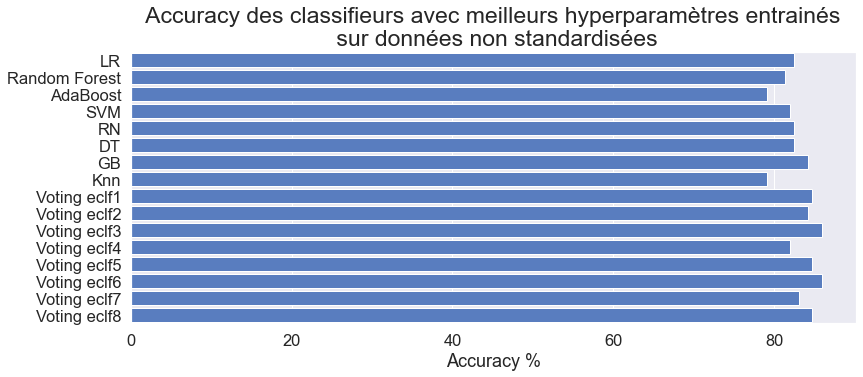

In [269]:
plt.figure(figsize=(13,5))
sns.set_color_codes("muted")
sns.barplot(data=df_accu, x="Accuracy", y=df_accu.index, color="b")
plt.xlabel('Accuracy %')
plt.title(' Accuracy des classifieurs avec meilleurs hyperparamètres entrainés \n sur données non standardisées', fontsize=23);


,F1_score
LR,82.660039
Random Forest,81.581700
AdaBoost,79.421789
SVM,82.079127
RN,82.158954
DT,80.908952
GB,84.124624
Knn,79.661017
Voting eclf1,85.258580
Voting eclf2,84.231856


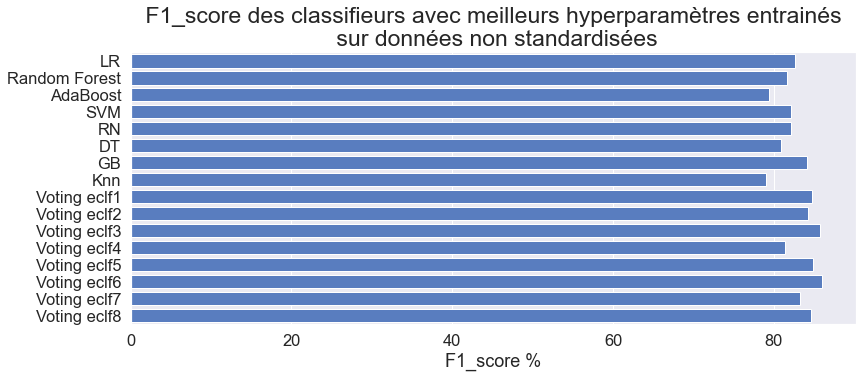

In [270]:
df_f1 = pd.DataFrame.from_dict(f1_dict, orient='index', columns=['F1_score'])
display(df_f1)
plt.figure(figsize=(13,5))
sns.set_color_codes("muted")
sns.barplot(data=df_f1, x="F1_score", y=df_f1.index, color="b")
plt.xlabel('F1_score %')
plt.title(' F1_score des classifieurs avec meilleurs hyperparamètres entrainés \n sur données non standardisées', fontsize=23);


,Accuracy,F1_score
Voting eclf6,85.875706,85.942428
Voting eclf3,85.875706,85.798732
Voting eclf5,84.745763,84.859937
Voting eclf3,84.745763,84.719306
Voting eclf8,84.745763,84.662630
Voting eclf2,84.180791,84.231856
GB,84.180791,84.124624
Voting eclf7,83.050847,83.199181
LR,82.485876,82.660039
RN,82.485876,82.158954


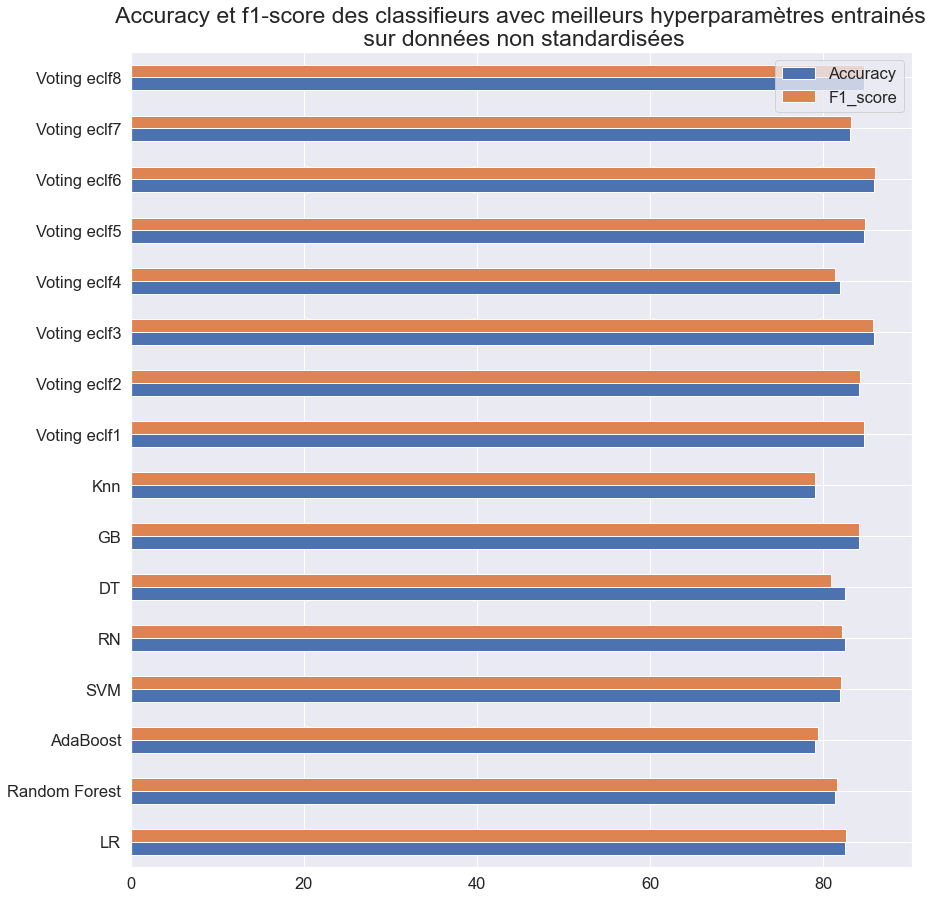

In [271]:
df_final = pd.concat([df_accu,df_f1],axis=1)
display(df_final.sort_values(by='F1_score',ascending=False))
df_final.plot.barh(y=["Accuracy","F1_score"],figsize=(14,15))
sns.set(font_scale=1.3)
plt.title(' Accuracy et f1-score des classifieurs avec meilleurs hyperparamètres entrainés \n sur données non standardisées', fontsize=23);


### Voting models: données standardisées  

In [272]:
eclf1_ss = eclf1.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf1_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf1"] = accu_val_hyperparm_ss*100

eclf2_ss = eclf2.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf2_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf2"] = accu_val_hyperparm_ss*100

eclf3_ss = eclf3.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf3_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf3"] = accu_val_hyperparm_ss*100

eclf4_ss = eclf4.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf4_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf4"] = accu_val_hyperparm_ss*100

eclf5_ss = eclf5.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf5_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf5"] = accu_val_hyperparm_ss*100

eclf6_ss = eclf6.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf6_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf6"] = accu_val_hyperparm_ss*100


eclf7_ss = eclf7.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf7_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf7"] = accu_val_hyperparm_ss*100

eclf8_ss = eclf8.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf8_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf8"] = accu_val_hyperparm_ss*100



In [273]:
f1score = f1_score(y_val, eclf1.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf1"]=f1score*100

f1score = f1_score(y_val, eclf2.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf2"]=f1score*100

f1score = f1_score(y_val, eclf3.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf3"]=f1score*100

f1score = f1_score(y_val, eclf4.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf4"]=f1score*100

f1score = f1_score(y_val, eclf5.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf5"]=f1score*100

f1score = f1_score(y_val, eclf6.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf6"]=f1score*100

f1score = f1_score(y_val, eclf7.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf7"]=f1score*100

f1score = f1_score(y_val, eclf8.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf8"]=f1score*100


In [274]:
test_ss= ss.transform(test_dataset) # fit the scaler to the test data


In [275]:
eclf1_pred_label_ss=eclf1_ss.predict(test_ss)
pred_dict_ss["eclf1"] = eclf1_pred_label_ss

eclf2_pred_label_ss=eclf2_ss.predict(test_ss)
pred_dict_ss["eclf2"] = eclf2_pred_label_ss

eclf3_pred_label_ss=eclf3_ss.predict(test_ss)
pred_dict_ss["eclf3"] = eclf3_pred_label_ss

eclf4_pred_label_ss=eclf4_ss.predict(test_ss)
pred_dict_ss["eclf4"] = eclf4_pred_label_ss

eclf5_pred_label_ss=eclf5_ss.predict(test_ss)
pred_dict_ss["eclf5"] = eclf5_pred_label_ss

eclf6_pred_label_ss=eclf6_ss.predict(test_ss)
pred_dict_ss["eclf6"] = eclf6_pred_label_ss

eclf7_pred_label_ss=eclf7_ss.predict(test_ss)
pred_dict_ss["eclf7"] = eclf7_pred_label_ss

eclf8_pred_label_ss=eclf8_ss.predict(test_ss)
pred_dict_ss["eclf8"] = eclf8_pred_label_ss

df_pred_ss = pd.DataFrame.from_dict(pred_dict_ss)
df_pred_ss.set_index(test_dataset.index,inplace=True)
df_pred_ss.to_csv('predictions/predictions_sur_ss_test.csv')


In [276]:
df_pred_ss

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree,Gradient boosting,KNN,eclf1,eclf2,eclf3,eclf4,eclf5,eclf6,eclf7,eclf8
PassengerId,,,,,,,,,,,,,,,,
892,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
893,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
894,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
895,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
896,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1306,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
1307,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Accuracy et F1-score pour nos modèles entrainés sur des données standardisées

,Accuracy
LR,80.225989
Random Forest,81.355932
Adaboost,79.096045
SVM,84.745763
RN,78.531073
Decision tree,82.485876
GB,84.180791
KNN,79.096045
Voting eclf1,81.920904
Voting eclf2,81.355932


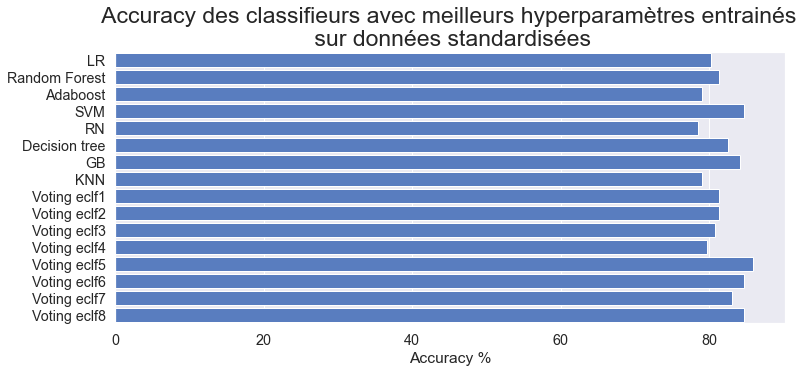

In [277]:
df_accu_ss = pd.DataFrame.from_dict(accu_dict_ss, orient='index', columns=['Accuracy'])
display(df_accu_ss)

plt.figure(figsize=(12,5))
sns.set_color_codes("muted")
sns.barplot(data=df_accu_ss, x="Accuracy", y=df_accu_ss.index, color="b")
plt.xlabel('Accuracy %')
plt.title(' Accuracy des classifieurs avec meilleurs hyperparamètres entrainés \n sur données standardisées', fontsize=23);

,F1_score
LR,80.534124
Random Forest,81.581700
Adaboost,79.421789
SVM,84.662630
RN,78.600376
Decision tree,82.616965
GB,84.124624
KNN,79.303918
Voting eclf1,82.079127
Voting eclf2,81.495479


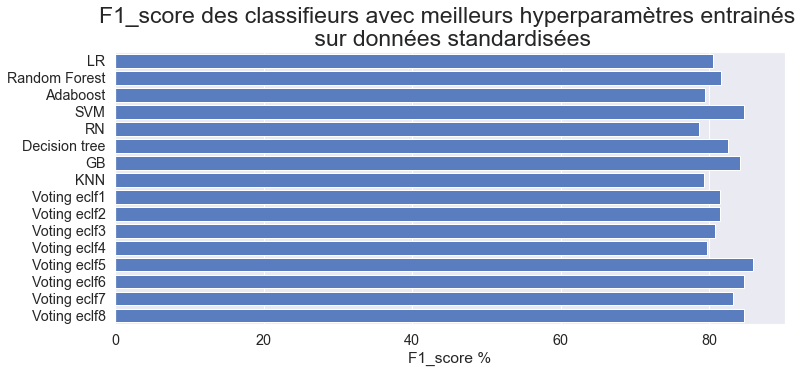

In [278]:
df_f1_ss = pd.DataFrame.from_dict(f1_dict_ss, orient='index', columns=['F1_score'])
display(df_f1_ss)
plt.figure(figsize=(12,5))
sns.set_color_codes("muted")
sns.barplot(data=df_f1_ss, x="F1_score", y=df_f1_ss.index, color="b")

plt.xlabel('F1_score %')
plt.title('F1_score des classifieurs avec meilleurs hyperparamètres entrainés \n sur données standardisées', fontsize=23);
plt.show()

,Accuracy,F1_score
Voting eclf5,85.875706,85.899064
SVM,84.745763,84.662630
Voting eclf6,84.745763,84.662630
Voting eclf8,84.745763,84.662630
GB,84.180791,84.124624
Voting eclf7,83.050847,83.199181
Decision tree,82.485876,82.616965
Random Forest,81.355932,81.581700
Voting eclf2,81.355932,81.495479
Voting eclf3,80.790960,80.852968


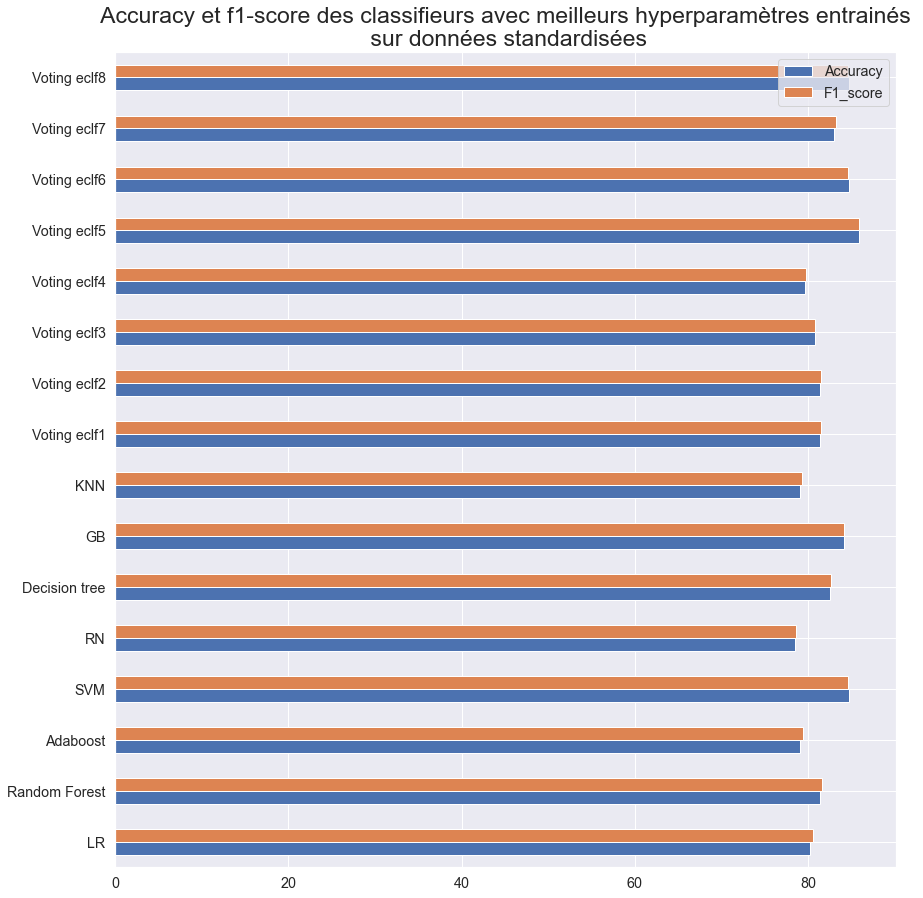

In [279]:
df_final_ss = pd.concat([df_accu_ss,df_f1_ss],axis=1)
display(df_final_ss.sort_values(by='F1_score',ascending=False))
sns.set(font_scale=1.3)
df_final_ss.plot.barh(y=["Accuracy","F1_score"],figsize=(14,15))
plt.title(' Accuracy et f1-score des classifieurs avec meilleurs hyperparamètres entrainés \n sur données standardisées', fontsize=23);
